In [1]:
import pandas as pd

In [2]:
russia_ukraine_df = pd.read_csv('russia_ukraine_conflict.csv', encoding = 'utf-8')

In [4]:
russia_ukraine_df.head()

,Date,Headline,Link
0,2022-04-23,"Why India can buy Russian oil, and still be fr...",https://www.cnn.com/2022/04/22/india/india-us-...
1,2022-04-22,4 ways Russia is trying to prove it can live w...,https://www.cnn.com/2022/04/22/business/russia...
2,2022-04-22,Russian tennis star Andrey Rublev says Wimbled...,https://www.cnn.com/2022/04/22/tennis/andrey-r...
3,2022-04-22,Russian troops use rape as ‘an instrument of w...,https://www.cnn.com/2022/04/22/europe/ukraine-...
4,2022-04-22,Some big Indian businesses are joining the exo...,https://www.cnn.com/2022/04/21/business/india-...


## Tokenization and Concordance

In [7]:
import nltk 
from nltk import word_tokenize
from nltk.text import Text

nltk.download('punkt')
nltk.download('stopwords')

russia_ukraine_df['Headline'].fillna('', inplace = True)

tokens = [word_tokenize(str(headline).lower()) for headline in russia_ukraine_df['Headline']]
flat_tokens = [token for sublist in tokens for token in sublist]

text = Text(flat_tokens)

aid_concordance = text.concordance('aid', width=100, lines=10)
us_concordance = text.concordance('us', width=100, lines=10)
death_concordance = text.concordance('deaths', width=100, lines=10)
civilians_concordance = text.concordance('civilians', width=100, lines=10)
energy_concordance = text.concordance('energy', width=100, lines=10)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Displaying 10 of 19 matches:
s s & p the west plans to increase its military aid to ukraine with russia planning its next big as
sia-ukraine news ukraine has requested military aid . here ’ s how allies are providing assistance 
me openness to providing military and financial aid to russia , us cable suggests in putin ’ s visi
biden and us allies face new dilemma on ukraine aid ukraine ’ s richest man vows to rebuild besiege
ces a race against time to get massive security aid to ukraine with fresh assault looming biden unv
ission to mariupol detained by russian forces , aid group says turkish drones have become a symbol 
pments in the ukraine conflict this weekend how aid organizations are responding to the crisis in u
members in the us us governors look for ways to aid ukraine , from field hospital kits to rebuildin
 announces hundreds of millions in new security aid for ukraine following zelensky ’ s speech ukrai
ck : trump ’ s misleading claims on obama-biden aid to ukraine the fate

## Sentiment Analysis

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each post
russia_ukraine_df['Sentiment_Score'] = russia_ukraine_df['Headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
russia_ukraine_df.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date,Headline,Link,Sentiment_Score
0,2022-04-23,"Why India can buy Russian oil, and still be fr...",https://www.cnn.com/2022/04/22/india/india-us-...,0.4767
1,2022-04-22,4 ways Russia is trying to prove it can live w...,https://www.cnn.com/2022/04/22/business/russia...,0.0000
2,2022-04-22,Russian tennis star Andrey Rublev says Wimbled...,https://www.cnn.com/2022/04/22/tennis/andrey-r...,-0.5574
3,2022-04-22,Russian troops use rape as ‘an instrument of w...,https://www.cnn.com/2022/04/22/europe/ukraine-...,-0.6908
4,2022-04-22,Some big Indian businesses are joining the exo...,https://www.cnn.com/2022/04/21/business/india-...,0.0000
5,2022-04-21,Putin rattles his ‘Satan II’ nuclear saber to ...,https://www.cnn.com/2022/04/21/europe/russia-i...,-0.8225
6,2022-04-21,"Pushed back from Kyiv, what’s Russia’s militar...",https://www.cnn.com/2022/04/20/europe/russia-u...,0.0000
7,2022-04-21,The head of Russia’s second biggest oil compan...,https://www.cnn.com/2022/04/21/business/lukoil...,0.0000
8,2022-04-21,Western pressure on Russia hasn’t stopped Puti...,https://www.cnn.com/2022/04/21/politics/us-put...,-0.4767
9,2022-04-21,An abandoned Russian military camp in a forest...,https://www.cnn.com/2022/04/20/europe/russian-...,-0.7717


In [10]:
keywords = ['energy','attack','invasion','resistance','americans','aid']

for keyword in keywords:
    russia_ukraine_df[keyword]= russia_ukraine_df['Headline'].str.contains(keyword, case=False)
russia_ukraine_df.head()

,Date,Headline,Link,Sentiment_Score,energy,attack,invasion,resistance,americans,aid
0,2022-04-23,"Why India can buy Russian oil, and still be fr...",https://www.cnn.com/2022/04/22/india/india-us-...,0.4767,False,False,False,False,False,False
1,2022-04-22,4 ways Russia is trying to prove it can live w...,https://www.cnn.com/2022/04/22/business/russia...,0.0000,False,False,False,False,False,False
2,2022-04-22,Russian tennis star Andrey Rublev says Wimbled...,https://www.cnn.com/2022/04/22/tennis/andrey-r...,-0.5574,False,False,False,False,False,False
3,2022-04-22,Russian troops use rape as ‘an instrument of w...,https://www.cnn.com/2022/04/22/europe/ukraine-...,-0.6908,False,False,False,False,False,False
4,2022-04-22,Some big Indian businesses are joining the exo...,https://www.cnn.com/2022/04/21/business/india-...,0.0000,False,False,False,False,False,False


In [14]:

keyword_columns = ['energy', 'attack', 'invasion', 'resistance','americans','aid']

# Count the occurrences of True for each keyword
keyword_counts = russia_ukraine_df[keyword_columns].sum()

# Display the counts
print("Keyword Counts:")
print(keyword_counts)

Keyword Counts:
energy        14
attack        35
invasion      66
resistance     4
americans      9
aid           27
dtype: int64


ukraine       425
russia        315
russian       208
putin         159
war           140
ukrainian      97
says           79
biden          78
invasion       66
zelensky       46
sanctions      44
world          43
kyiv           37
europe         31
oil            29
new            29
ukrainians     27
say            26
refugees       23
media          23
dtype: int64


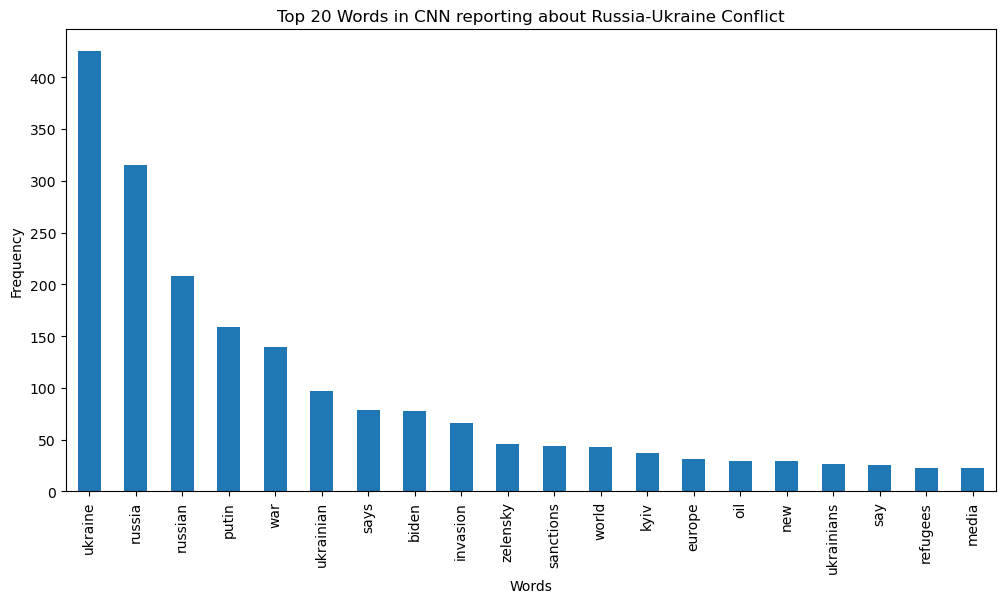

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# exclude words 

corpus = russia_ukraine_df['Headline'].astype(str)
# Use TfidfVectorizer with custom stopwords





# Tokenization and counting word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
x = vectorizer.fit_transform(corpus)


# Creating a DataFrame with word frequencies
word_freq_df = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Summing up the word frequencies
word_freq_sum = word_freq_df.sum()

# Sorting the words by frequency
sorted_word_freq = word_freq_sum.sort_values(ascending=False)


# Displaying the top N words and their frequencies
top_n_words = 20
print(sorted_word_freq.head(top_n_words))

# Plotting the top N words
plt.figure(figsize=(12, 6))
sorted_word_freq.head(top_n_words).plot(kind='bar')
plt.title('Top {} Words in CNN reporting about Russia-Ukraine Conflict'.format(top_n_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
